In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

Test data cleaning

In [2]:
test_data = pd.read_csv('pml-testing.csv')
test_data = test_data.drop(['Unnamed: 0', 'cvtd_timestamp', 'problem_id', 'user_name'], axis = 1)
test_data

raw_timestamp_part_1  raw_timestamp_part_2 new_window  num_window  \
0             1323095002                868349         no          74   
1             1322673067                778725         no         431   
2             1322673075                342967         no         439   
3             1322832789                560311         no         194   
4             1322489635                814776         no         235   
5             1322673149                510661         no         504   
6             1322673128                766645         no         485   
7             1322673076                 54671         no         440   
8             1323084240                916313         no         323   
9             1322837822                384285         no         664   
10            1323084277                 36553         no         859   
11            1322673101                442731         no         461   
12            1322489661                298656         no         257   
13            1322673043                178652         no         408   
14            1322673156                550750         no         779   
15            1322489713                706637         no         302   
16            1323094971                920315         no          48   
17            1323084285                176314         no         361   
18            1323094999                828379         no          72   
19            1322489658                106658         no         255   

    roll_belt  pitch_belt  yaw_belt  total_accel_belt  kurtosis_roll_belt  \
0      123.00       27.00     -4.75                20                 NaN   
1        1.02        4.87    -88.90                 4                 NaN   
2        0.87        1.82    -88.50                 5                 NaN   
3      125.00      -41.60    162.00                17                 NaN   
4        1.35        3.33    -88.60                 3                 NaN   
5       -5.92        1.59    -87.70                 4                 NaN   
6        1.20        4.44    -87.30                 4                 NaN   
7        0.43        4.15    -88.50                 4                 NaN   
8        0.93        6.72    -93.70                 4                 NaN   
9      114.00       22.40    -13.10                18                 NaN   
10       0.92        5.94    -92.70                 3                 NaN   
11       1.01        4.96    -87.80                 5                 NaN   
12       0.54        2.45    -88.60                 3                 NaN   
13       0.45        5.02    -87.90                 5                 NaN   
14       5.34       -3.09    -80.30                 4                 NaN   
15       1.65        3.47    -87.00                 2                 NaN   
16     129.00       27.80      1.84                21                 NaN   
17       0.92        5.31    -93.10                 3                 NaN   
18     123.00       26.70     -2.68                19                 NaN   
19       1.40        3.20    -88.70                 3                 NaN   

    kurtosis_picth_belt  ...  var_yaw_forearm  gyros_forearm_x  \
0                   NaN  ...              NaN             0.74   
1                   NaN  ...              NaN             1.12   
2                   NaN  ...              NaN             0.18   
3                   NaN  ...              NaN             1.38   
4                   NaN  ...              NaN            -0.75   
5                   NaN  ...              NaN            -0.88   
6                   NaN  ...              NaN            -0.53   
7                   NaN  ...              NaN             0.63   
8                   NaN  ...              NaN             0.03   
9                   NaN  ...              NaN             0.02   
10                  NaN  ...              NaN             0.05   
11                  NaN  ...              NaN            -0.

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 156 entries, raw_timestamp_part_1 to magnet_forearm_z
dtypes: float64(124), int64(31), object(1)
memory usage: 24.5+ KB


In [4]:
test_data.describe()

raw_timestamp_part_1  raw_timestamp_part_2  num_window   roll_belt  \
count          2.000000e+01             20.000000   20.000000   20.000000   
mean           1.322778e+09         512167.400000  379.550000   31.305500   
std            2.305603e+05         303068.105395  218.549639   54.288156   
min            1.322490e+09          36553.000000   48.000000   -5.920000   
25%            1.322673e+09         268655.000000  250.000000    0.907500   
50%            1.322673e+09         530705.500000  384.500000    1.110000   
75%            1.323084e+09         787737.750000  467.000000   32.505000   
max            1.323095e+09         920315.000000  859.000000  129.000000   

       pitch_belt    yaw_belt  total_accel_belt  kurtosis_roll_belt  \
count   20.000000   20.000000         20.000000                 0.0   
mean     5.824000  -59.299500          7.550000                 NaN   
std     14.586447   62.433525          6.863136                 NaN   
min    -41.600000  -93.700000          2.000000                 NaN   
25%      3.012500  -88.625000          3.000000                 NaN   
50%      4.655000  -87.850000          4.000000                 NaN   
75%      6.135000  -63.500000          8.000000                 NaN   
max     27.800000  162.000000         21.000000                 NaN   

       kurtosis_picth_belt  kurtosis_yaw_belt  ...  var_yaw_forearm  \
count                  0.0                0.0  ...              0.0   
mean                   NaN                NaN  ...              NaN   
std                    NaN                NaN  ...              NaN   
min                    NaN                NaN  ...              NaN   
25%                    NaN                NaN  ...              NaN   
50%                    NaN                NaN  ...              NaN   
75%                    NaN                NaN  ...              NaN   
max                    NaN                NaN  ...              NaN   

       gyros_forearm_x  gyros_forearm_y  gyros_forearm_z  accel_forearm_x  \
count        20.000000        20.000000        20.000000        20.000000   
mean         -0.020000        -0.041500         0.261000        38.800000   
std           0.687176         2.872582         0.790116       156.973883   
min          -1.060000        -5.970000        -1.260000      -212.000000   
25%          -0.585000        -1.287500        -0.097500      -114.750000   
50%           0.020000         0.035000         0.230000        86.000000   
75%           0.292500         2.047500         0.762500       166.250000   
max           1.380000         4.260000         1.800000       232.000000   

       accel_forearm_y  accel_forearm_z  magnet_forearm_x  magnet_forearm_y  \
count         20.00000        20.000000         20.000000         20.000000   
mean         125.30000       -93.700000       -159.250000        191.750000   
std          190.50987       149.202829        362.278735        619.345399   
min         -331.00000      -282.000000       -714.000000       -787.000000   
25%            8.50000      -199.000000       -427.250000       -328.750000   
50%          138.00000      -148.500000       -189.500000        487.000000   
75%          268.00000       -31.000000         41.500000        720.750000   
max          406.00000       179.000000        532.000000        800.000000   

       magnet_forearm_z  
count         20.000000  
mean         460.250000  
std          282.131898  
min          -32.000000  
25%          275.250000  
50%          491.500000  
75%          661.500000  
max          884.000000  

[8 rows x 155 columns]

In [5]:
columns_drop = test_data.columns[test_data.isnull().all()]
columns_drop

Index(['kurtosis_roll_belt', 'kurtosis_picth_belt', 'kurtosis_yaw_belt',
       'skewness_roll_belt', 'skewness_roll_belt.1', 'skewness_yaw_belt',
       'max_roll_belt', 'max_picth_belt', 'max_yaw_belt', 'min_roll_belt',
       'min_pitch_belt', 'min_yaw_belt', 'amplitude_roll_belt',
       'amplitude_pitch_belt', 'amplitude_yaw_belt', 'var_total_accel_belt',
       'avg_roll_belt', 'stddev_roll_belt', 'var_roll_belt', 'avg_pitch_belt',
       'stddev_pitch_belt', 'var_pitch_belt', 'avg_yaw_belt',
       'stddev_yaw_belt', 'var_yaw_belt', 'var_accel_arm', 'avg_roll_arm',
       'stddev_roll_arm', 'var_roll_arm', 'avg_pitch_arm', 'stddev_pitch_arm',
       'var_pitch_arm', 'avg_yaw_arm', 'stddev_yaw_arm', 'var_yaw_arm',
       'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm',
       'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm',
       'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 'min_roll_arm',
       'min_pitch_arm', 'min_yaw_arm', 'amplitude_roll_arm'

In [6]:
#test_data[test_data.isnull().all(axis=1)]

test_data.drop(columns = columns_drop, inplace = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 56 columns):
raw_timestamp_part_1    20 non-null int64
raw_timestamp_part_2    20 non-null int64
new_window              20 non-null object
num_window              20 non-null int64
roll_belt               20 non-null float64
pitch_belt              20 non-null float64
yaw_belt                20 non-null float64
total_accel_belt        20 non-null int64
gyros_belt_x            20 non-null float64
gyros_belt_y            20 non-null float64
gyros_belt_z            20 non-null float64
accel_belt_x            20 non-null int64
accel_belt_y            20 non-null int64
accel_belt_z            20 non-null int64
magnet_belt_x           20 non-null int64
magnet_belt_y           20 non-null int64
magnet_belt_z           20 non-null int64
roll_arm                20 non-null float64
pitch_arm               20 non-null float64
yaw_arm                 20 non-null float64
total_accel_arm         20 non-null in

In [7]:
test_data = pd.get_dummies(test_data)
test_data['new_window_yes'] = 0
test_data.head()

raw_timestamp_part_1  raw_timestamp_part_2  num_window  roll_belt  \
0            1323095002                868349          74     123.00   
1            1322673067                778725         431       1.02   
2            1322673075                342967         439       0.87   
3            1322832789                560311         194     125.00   
4            1322489635                814776         235       1.35   

   pitch_belt  yaw_belt  total_accel_belt  gyros_belt_x  gyros_belt_y  \
0       27.00     -4.75                20         -0.50         -0.02   
1        4.87    -88.90                 4         -0.06         -0.02   
2        1.82    -88.50                 5          0.05          0.02   
3      -41.60    162.00                17          0.11          0.11   
4        3.33    -88.60                 3          0.03          0.02   

   gyros_belt_z  ...  gyros_forearm_y  gyros_forearm_z  accel_forearm_x  \
0         -0.46  ...            -3.34            -0.59             -110   
1         -0.07  ...            -2.78            -0.18              212   
2          0.03  ...            -0.79             0.28              154   
3         -0.16  ...             0.69             1.80              -92   
4          0.00  ...             3.10             0.80              131   

   accel_forearm_y  accel_forearm_z  magnet_forearm_x  magnet_forearm_y  \
0              267             -149              -714               419   
1              297             -118              -237               791   
2              271             -129               -51               698   
3              406              -39              -233               783   
4              -93              172               375              -787   

   magnet_forearm_z  new_window_no  new_window_yes  
0               617              1               0  
1               873              1               0  
2               783              1               0  
3               521              1               0  
4                91              1               0  

[5 rows x 57 columns]

Training data cleaning

In [8]:
training_data = pd.read_csv('pml-training.csv')
training_data = training_data.drop(['Unnamed: 0', 'cvtd_timestamp', 'user_name'], axis = 1)
training_data.head()

C:\Users\Denys\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


raw_timestamp_part_1  raw_timestamp_part_2 new_window  num_window  \
0            1323084231                788290         no          11   
1            1323084231                808298         no          11   
2            1323084231                820366         no          11   
3            1323084232                120339         no          12   
4            1323084232                196328         no          12   

   roll_belt  pitch_belt  yaw_belt  total_accel_belt kurtosis_roll_belt  \
0       1.41        8.07     -94.4                 3                NaN   
1       1.41        8.07     -94.4                 3                NaN   
2       1.42        8.07     -94.4                 3                NaN   
3       1.48        8.05     -94.4                 3                NaN   
4       1.48        8.07     -94.4                 3                NaN   

  kurtosis_picth_belt  ... gyros_forearm_x gyros_forearm_y gyros_forearm_z  \
0                 NaN  ...            0.03            0.00           -0.02   
1                 NaN  ...            0.02            0.00           -0.02   
2                 NaN  ...            0.03           -0.02            0.00   
3                 NaN  ...            0.02           -0.02            0.00   
4                 NaN  ...            0.02            0.00           -0.02   

  accel_forearm_x  accel_forearm_y  accel_forearm_z magnet_forearm_x  \
0             192              203             -215              -17   
1             192              203             -216              -18   
2             196              204             -213              -18   
3             189              206             -214              -16   
4             189              206             -214              -17   

   magnet_forearm_y  magnet_forearm_z classe  
0             654.0             476.0      A  
1             661.0             473.0      A  
2             658.0             469.0      A  
3             658.0             469.0      A  
4             655.0             473.0      A  

[5 rows x 157 columns]

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 157 entries, raw_timestamp_part_1 to classe
dtypes: float64(94), int64(28), object(35)
memory usage: 23.5+ MB


In [10]:
columns_drop_train = training_data.columns[training_data.isnull().any()]
columns_drop_train

Index(['kurtosis_roll_belt', 'kurtosis_picth_belt', 'kurtosis_yaw_belt',
       'skewness_roll_belt', 'skewness_roll_belt.1', 'skewness_yaw_belt',
       'max_roll_belt', 'max_picth_belt', 'max_yaw_belt', 'min_roll_belt',
       'min_pitch_belt', 'min_yaw_belt', 'amplitude_roll_belt',
       'amplitude_pitch_belt', 'amplitude_yaw_belt', 'var_total_accel_belt',
       'avg_roll_belt', 'stddev_roll_belt', 'var_roll_belt', 'avg_pitch_belt',
       'stddev_pitch_belt', 'var_pitch_belt', 'avg_yaw_belt',
       'stddev_yaw_belt', 'var_yaw_belt', 'var_accel_arm', 'avg_roll_arm',
       'stddev_roll_arm', 'var_roll_arm', 'avg_pitch_arm', 'stddev_pitch_arm',
       'var_pitch_arm', 'avg_yaw_arm', 'stddev_yaw_arm', 'var_yaw_arm',
       'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm',
       'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm',
       'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 'min_roll_arm',
       'min_pitch_arm', 'min_yaw_arm', 'amplitude_roll_arm'

In [11]:
percent_missing = training_data.isnull().sum() * 100 / len(training_data)
missing_value_train_data = pd.DataFrame({'column_name': training_data.columns,
                                         'percent_missing': percent_missing})
missing_values_greater_than_70_perc = missing_value_train_data[missing_value_train_data['percent_missing'] > 70.0]

missing_column_names = missing_values_greater_than_70_perc['column_name'].tolist()

In [12]:
training_data.drop(columns = missing_column_names, inplace = True)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Data columns (total 57 columns):
raw_timestamp_part_1    19622 non-null int64
raw_timestamp_part_2    19622 non-null int64
new_window              19622 non-null object
num_window              19622 non-null int64
roll_belt               19622 non-null float64
pitch_belt              19622 non-null float64
yaw_belt                19622 non-null float64
total_accel_belt        19622 non-null int64
gyros_belt_x            19622 non-null float64
gyros_belt_y            19622 non-null float64
gyros_belt_z            19622 non-null float64
accel_belt_x            19622 non-null int64
accel_belt_y            19622 non-null int64
accel_belt_z            19622 non-null int64
magnet_belt_x           19622 non-null int64
magnet_belt_y           19622 non-null int64
magnet_belt_z           19622 non-null int64
roll_arm                19622 non-null float64
pitch_arm               19622 non-null float64
yaw_arm            

In [13]:
training_data['classe'] = training_data['classe'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})
training_data = pd.get_dummies(training_data)
training_data = training_data[['raw_timestamp_part_1', 'raw_timestamp_part_2', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forearm_z', 'new_window_no', 'new_window_yes', 'classe']]

training_data.head()

raw_timestamp_part_1  raw_timestamp_part_2  num_window  roll_belt  \
0            1323084231                788290          11       1.41   
1            1323084231                808298          11       1.41   
2            1323084231                820366          11       1.42   
3            1323084232                120339          12       1.48   
4            1323084232                196328          12       1.48   

   pitch_belt  yaw_belt  total_accel_belt  gyros_belt_x  gyros_belt_y  \
0        8.07     -94.4                 3          0.00          0.00   
1        8.07     -94.4                 3          0.02          0.00   
2        8.07     -94.4                 3          0.00          0.00   
3        8.05     -94.4                 3          0.02          0.00   
4        8.07     -94.4                 3          0.02          0.02   

   gyros_belt_z  ...  gyros_forearm_z  accel_forearm_x  accel_forearm_y  \
0         -0.02  ...            -0.02              192              203   
1         -0.02  ...            -0.02              192              203   
2         -0.02  ...             0.00              196              204   
3         -0.03  ...             0.00              189              206   
4         -0.02  ...            -0.02              189              206   

   accel_forearm_z  magnet_forearm_x  magnet_forearm_y  magnet_forearm_z  \
0             -215               -17             654.0             476.0   
1             -216               -18             661.0             473.0   
2             -213               -18             658.0             469.0   
3             -214               -16             658.0             469.0   
4             -214               -17             655.0             473.0   

   new_window_no  new_window_yes  classe  
0              1               0       1  
1              1               0       1  
2              1               0       1  
3              1               0       1  
4              1               0       1  

[5 rows x 58 columns]

Splitting the data into targets and inputs (features)

In [14]:
targets = training_data['classe']
inputs = training_data.drop(['classe'], axis = 1)

Creating the decision tree classifier

In [15]:
from sklearn import tree

In [16]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(inputs, targets, test_size = 0.3, random_state = 365)
clf = tree.DecisionTreeClassifier()

Training the decision tree algorithm

In [17]:
clf_train = clf.fit(X_train_tree, y_train_tree)
prediction_tree = clf_train.predict(X_test_tree)

Comparing the results with real values

In [18]:
comparison_table_tree = pd.DataFrame()
comparison_table_tree['Real values'] = y_test_tree
comparison_table_tree['Predictions'] = prediction_tree
comparison_table_tree

Real values  Predictions
3616             1            1
11404            3            3
16707            5            5
10439            3            3
16761            5            5
...            ...          ...
9897             3            3
12139            3            3
17872            5            5
404              1            1
248              1            1

[5887 rows x 2 columns]

Predicting the 'classe' based on the test dataset

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_tree, prediction_tree, normalize=True)

0.9763886529641583

In [20]:
confusion_matrix_1 = pd.crosstab(y_test_tree, prediction_tree, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix_1)

Predicted     1     2    3    4     5
Actual                               
1          1695    10    1    4     0
2            17  1076   11   14     2
3             0     9  968    9     2
4             1    11   12  958     6
5             1    14    2   13  1051


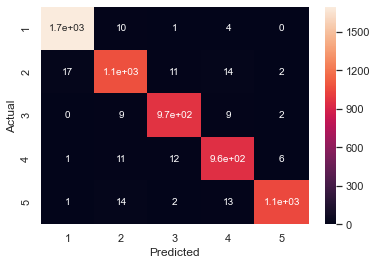

In [21]:
sns.heatmap(confusion_matrix_1, annot=True)
plt.show()

In [22]:
prediction = clf_train.predict(test_data)
prediction

array([2, 1, 2, 1, 1, 5, 4, 2, 1, 1, 2, 3, 2, 1, 5, 5, 1, 2, 2, 2],
      dtype=int64)

Just for fun: Export a desicion tree in a DOT format

In [23]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf_train, out_file = None, feature_names = list(inputs.columns.values),
                               rounded = True, filled = True, class_names = str(targets.unique()))
#print(dot_data)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [24]:
#graph.write_pdf("decision_tree.pdf")

Random forest: splitting the data and fitting the model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.3, random_state = 20)

In [27]:
model = RandomForestClassifier(n_estimators = 10, random_state = 30)

In [28]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Prediction of outcomes and comparing with real values

In [29]:
prediction_test = model.predict(X_test)

In [30]:
comparison_table = pd.DataFrame()
comparison_table['Real values'] = y_test
comparison_table['Predictions'] = prediction_test
comparison_table

Real values  Predictions
18822            5            5
9723             3            3
6870             2            2
17550            5            5
18212            5            5
...            ...          ...
7059             2            2
10851            3            3
15212            4            4
10767            3            3
13351            4            4

[5887 rows x 2 columns]

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction_test, normalize=True)

0.9916765755053508

In [32]:
confusion_matrix = pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     1     2     3    4     5
Actual                                
1          1660     0     0    0     0
2            14  1116     7    0     0
3             0    10  1057    1     0
4             0     0     9  940     2
5             0     3     0    3  1065


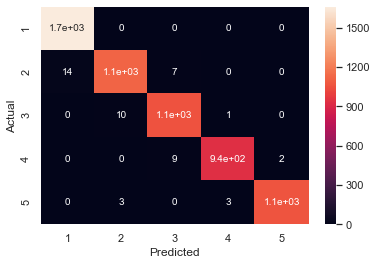

In [33]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Predicting the test_data values

In [34]:
prediction_1 = model.predict(test_data)
prediction_1

array([2, 1, 2, 1, 1, 5, 4, 2, 1, 1, 2, 3, 2, 1, 5, 5, 1, 2, 2, 2],
      dtype=int64)

Comparing the results from both algorithms

In [35]:
comparison = pd.DataFrame()
comparison['Decision Tree Predictions'] = prediction
comparison['Random Forest Predictions'] = prediction_1
comparison

Decision Tree Predictions  Random Forest Predictions
0                           2                          2
1                           1                          1
2                           2                          2
3                           1                          1
4                           1                          1
5                           5                          5
6                           4                          4
7                           2                          2
8                           1                          1
9                           1                          1
10                          2                          2
11                          3                          3
12                          2                          2
13                          1                          1
14                          5                          5
15                          5                          5
16                          1                          1
17                          2                          2
18                          2                          2
19                          2                          2